In [2445]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cassiopeia as cass
import matplotlib.pyplot as plt
import xgboost as xgb

from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2446]:
All_Games = pd.read_csv("All_Matches.csv")

In [2447]:
pd.options.display.max_columns = None

In [2448]:
All_Games.shape

(561, 189)

In [2449]:
All_Games.head(10)

,ID,Win,Side,Rank,Top_Current_Champ,Top_games_on_role,Top_games_on_champ,Jg_Current_Champ,Jg_games_on_role,Jg_games_on_champ,Mid_Current_Champ,Mid_games_on_role,Mid_games_on_champ,Bot_Current_Champ,Bot_games_on_role,Bot_games_on_champ,Sup_Current_Champ,Sup_games_on_role,Sup_games_on_champ,Top_Enemy_Champ,Jg_Enemy_Champ,Mid_Enemy_Champ,Bot_Enemy_Champ,Sup_Enemy_Champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score
0,4272358677,False,Red,Gold,Gragas,6,0,Vi,17,10,Vladimir,0,0,Draven,20,15,Pyke,19,5,Teemo,Poppy,Morgana,Jhin,Renata Glasc,0,8,0,0,0,16.25,0.25,0.15,0.25,39.80,0.95,1.15,0.85,1.50,2.60,1.80,64.00,2.080247,3.65,6.55,7.70,130.00,14193.60,21993.50,10168.10,2925.80,1.10,1.85,0.30,0.25,12.15,1.75,19.05,0,11,1,0,0,20.90,0.30,0.40,0.40,43.10,1.25,1.35,0.95,2.90,2.45,2.40,58.30,2.315952,7.20,7.60,7.05,126.35,16766.75,26131.95,11596.00,1187.50,1.05,1.80,3.80,3.20,6.50,3.35,20.90,1,17,1,0,0,21.25,0.40,0.75,0.50,52.35,1.15,1.75,1.15,2.00,3.00,1.75,84.35,2.052915,7.10,7.40,7.30,191.30,22446.30,27976.35,12900.05,2184.20,0.80,1.40,0.60,0.60,11.15,3.05,14.35,1,19,3,0,0,26.65,0.20,0.85,0.35,62.95,1.05,2.25,1.05,2.45,3.90,1.75,97.75,2.087438,6.85,8.60,6.45,193.60,21023.90,20242.20,12650.65,3746.70,1.20,2.35,0.05,0.05,7.60,2.15,12.70,0,4,0,0,0,5.15,0.20,0.25,0.65,11.00,0.70,0.75,1.70,1.45,1.60,3.25,19.50,4.698690,3.15,4.85,11.90,38.30,11145.40,15152.80,9566.55,1118.75,0.35,1.80,2.40,2.15,25.15,6.80,28.85
1,4272324079,True,Red,Gold,Teemo,19,4,Lee Sin,0,6,Viktor,17,14,Miss Fortune,0,0,Thresh,12,1,Fiora,Kayn,Ahri,Ezreal,Lux,3,16,3,0,0,23.05,0.50,0.75,0.10,54.40,1.30,2.15,0.35,2.15,3.15,0.65,86.25,1.870790,6.05,8.15,7.00,171.20,21133.35,29675.90,12017.45,4584.75,1.55,2.60,1.50,1.20,8.05,2.15,26.8

In [2450]:
All_Games["Win"] = All_Games["Win"].astype(int)

All_Games["Side"] = All_Games["Side"].astype('category')
All_Games["Side"] = All_Games["Side"].cat.codes

All_Games.drop(['ID', 'Rank'], axis=1, inplace=True)

In [2451]:
All_Games.head(10)

,Win,Side,Top_Current_Champ,Top_games_on_role,Top_games_on_champ,Jg_Current_Champ,Jg_games_on_role,Jg_games_on_champ,Mid_Current_Champ,Mid_games_on_role,Mid_games_on_champ,Bot_Current_Champ,Bot_games_on_role,Bot_games_on_champ,Sup_Current_Champ,Sup_games_on_role,Sup_games_on_champ,Top_Enemy_Champ,Jg_Enemy_Champ,Mid_Enemy_Champ,Bot_Enemy_Champ,Sup_Enemy_Champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score
0,0,1,Gragas,6,0,Vi,17,10,Vladimir,0,0,Draven,20,15,Pyke,19,5,Teemo,Poppy,Morgana,Jhin,Renata Glasc,0,8,0,0,0,16.25,0.25,0.15,0.25,39.80,0.95,1.15,0.85,1.50,2.60,1.80,64.00,2.080247,3.65,6.55,7.70,130.00,14193.60,21993.50,10168.10,2925.80,1.10,1.85,0.30,0.25,12.15,1.75,19.05,0,11,1,0,0,20.90,0.30,0.40,0.40,43.10,1.25,1.35,0.95,2.90,2.45,2.40,58.30,2.315952,7.20,7.60,7.05,126.35,16766.75,26131.95,11596.00,1187.50,1.05,1.80,3.80,3.20,6.50,3.35,20.90,1,17,1,0,0,21.25,0.40,0.75,0.50,52.35,1.15,1.75,1.15,2.00,3.00,1.75,84.35,2.052915,7.10,7.40,7.30,191.30,22446.30,27976.35,12900.05,2184.20,0.80,1.40,0.60,0.60,11.15,3.05,14.35,1,19,3,0,0,26.65,0.20,0.85,0.35,62.95,1.05,2.25,1.05,2.45,3.90,1.75,97.75,2.087438,6.85,8.60,6.45,193.60,21023.90,20242.20,12650.65,3746.70,1.20,2.35,0.05,0.05,7.60,2.15,12.70,0,4,0,0,0,5.15,0.20,0.25,0.65,11.00,0.70,0.75,1.70,1.45,1.60,3.25,19.50,4.698690,3.15,4.85,11.90,38.30,11145.40,15152.80,9566.55,1118.75,0.35,1.80,2.40,2.15,25.15,6.80,28.85
1,1,1,Teemo,19,4,Lee Sin,0,6,Viktor,17,14,Miss Fortune,0,0,Thresh,12,1,Fiora,Kayn,Ahri,Ezreal,Lux,3,16,3,0,0,23.05,0.50,0.75,0.10,54.40,1.30,2.15,0.35,2.15,3.15,0.65,86.25,1.870790,6.05,8.15,7.00,171.20,21133.35,29675.90,12017.45,4584.75,1.55,2.60,1.50,1.20,8.05,2.15,26.85,1,2,1,0,0,24.85,0.45,0.40,0.25,65.30,0.90,1.15,0.

In [2452]:
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(All_Games[["Top_Current_Champ", "Jg_Current_Champ", "Mid_Current_Champ", "Bot_Current_Champ", "Sup_Current_Champ","Top_Enemy_Champ", "Jg_Enemy_Champ", "Mid_Enemy_Champ", "Bot_Enemy_Champ", "Sup_Enemy_Champ"]]).toarray())
#final_df = All_Games.join(encoder_df)


In [2453]:
encoder_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [2454]:
All_Games = All_Games.join(encoder_df)

In [2455]:
All_Games = All_Games.drop(["Top_Current_Champ", "Jg_Current_Champ", "Mid_Current_Champ", "Bot_Current_Champ", "Sup_Current_Champ","Top_Enemy_Champ", "Jg_Enemy_Champ", "Mid_Enemy_Champ", "Bot_Enemy_Champ", "Sup_Enemy_Champ"],axis=1)

In [2456]:
All_Games.head()

,Win,Side,Top_games_on_role,Top_games_on_champ,Jg_games_on_role,Jg_games_on_champ,Mid_games_on_role,Mid_games_on_champ,Bot_games_on_role,Bot_games_on_champ,Sup_games_on_role,Sup_games_on_champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,

In [2457]:
#one_hot_encoded_data = pd.get_dummies(All_Games, columns = ["Top_Current_Champ", "Jg_Current_Champ", "Mid_Current_Champ", "Bot_Current_Champ", "Sup_Current_Champ","Top_Enemy_Champ", "Jg_Enemy_Champ", "Mid_Enemy_Champ", "Bot_Enemy_Champ", "Sup_Enemy_Champ"])

In [2458]:
#one_hot_encoded_data.head(5)

In [2459]:
#one_hot_encoded_data = shuffle(one_hot_encoded_data)

In [2460]:
# X = one_hot_encoded_data.iloc[:,1:]
# y = one_hot_encoded_data.iloc[:,0]

X = All_Games.iloc[:,1:]
y = All_Games.iloc[:,0]



In [2461]:
X

,Side,Top_games_on_role,Top_games_on_champ,Jg_games_on_role,Jg_games_on_champ,Mid_games_on_role,Mid_games_on_champ,Bot_games_on_role,Bot_games_on_champ,Sup_games_on_role,Sup_games_on_champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,

In [2462]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_ratio)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=validation_ratio/(train_ratio+test_ratio))


In [2463]:
model_one_hot = keras.Sequential() # create model

model_one_hot.add(layers.Dense(512, input_dim=762, activation='relu')) # Input layer

model_one_hot.add(layers.Dense(512, activation='relu')) # hidden layer

model_one_hot.add(layers.Dense(1, activation='sigmoid')) # output layer

model_one_hot.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_one_hot.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 512)               390656    
                                                                 
 dense_286 (Dense)           (None, 512)               262656    
                                                                 
 dense_287 (Dense)           (None, 1)                 513       
                                                                 
Total params: 653,825
Trainable params: 653,825
Non-trainable params: 0
_________________________________________________________________


In [2464]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=12, restore_best_weights=True)

In [2465]:
with tf.device('/GPU:0'):
    fit_model_one_hot = model_one_hot.fit(X_train, Y_train, validation_data=(X_valid,Y_valid), epochs=250, callbacks=es)

Epoch 1/250
14/14 [==============================] - 1s 87ms/step - loss: 1431.3220 - acc: 0.4922 - val_loss: 248.8709 - val_acc: 0.3860
Epoch 2/250
14/14 [==============================] - 0s 5ms/step - loss: 337.2702 - acc: 0.5235 - val_loss: 139.6854 - val_acc: 0.6140
Epoch 3/250
14/14 [==============================] - 0s 6ms/step - loss: 141.9093 - acc: 0.4877 - val_loss: 45.2928 - val_acc: 0.5263
Epoch 4/250
14/14 [==============================] - 0s 4ms/step - loss: 61.2965 - acc: 0.5056 - val_loss: 133.0132 - val_acc: 0.3860
Epoch 5/250
14/14 [==============================] - 0s 5ms/step - loss: 95.3658 - acc: 0.5123 - val_loss: 40.6886 - val_acc: 0.4912
Epoch 6/250
14/14 [==============================] - 0s 4ms/step - loss: 40.0880 - acc: 0.5884 - val_loss: 93.7177 - val_acc: 0.3860
Epoch 7/250
14/14 [==============================] - 0s 5ms/step - loss: 48.1635 - acc: 0.5280 - val_loss: 28.7466 - val_acc: 0.4386
Epoch 8/250
14/14 [==============================] - 0s 4ms/s

In [2466]:
score = model_one_hot.evaluate(X_test, Y_test,verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 7.599430084228516 / Test accuracy: 0.6140350699424744


In [2477]:
model_one_hot.save("Model61-encoder.h5")

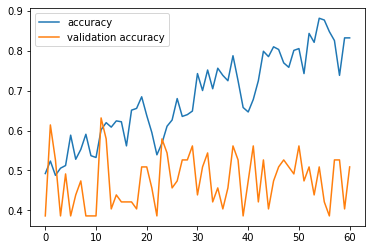

In [2468]:
plt.plot(fit_model_one_hot.history['acc'])
plt.plot(fit_model_one_hot.history['val_acc'])
plt.legend(['accuracy','validation accuracy'])

In [2478]:
model = load_model('Model61-encoder.h5')

In [2479]:
lobby =  pd.read_csv("lobby.csv")

In [2480]:
lobby.head()

,Side,Top_Current_Champ,Top_games_on_role,Top_games_on_champ,Jg_Current_Champ,Jg_games_on_role,Jg_games_on_champ,Mid_Current_Champ,Mid_games_on_role,Mid_games_on_champ,Bot_Current_Champ,Bot_games_on_role,Bot_games_on_champ,Sup_Current_Champ,Sup_games_on_role,Sup_games_on_champ,Top_Enemy_Champ,Jg_Enemy_Champ,Mid_Enemy_Champ,Bot_Enemy_Champ,Sup_Enemy_Champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score
0,1,Irelia,18,6,Graves,16,6,Ahri,15,3,Vayne,20,9,Lulu,17,2,Jayce,Hecarim,Sylas,Jinx,Leona,2,12,2,0,0,28.95,0.3,0.2,0.2,71.1,1.45,1.0,0.35,2.35,1.7,1.05,110.35,4.083929,6.5,3.75,6.05,188.2,17800.6,22499.6,11630.6,3470.15,1.6,2.7,0.0,0.0,6.1,1.1,7.0,3,28,6,0,0,23.3,0.65,0.55,0.8,51.9,1.9,1.55,1.35,3.8,2.6,2.6,79.45,4.511806,8.5,5.3,7.6,182.85,17895.25,23540.05,12938.4,1560.2,0.85,1.95,3.3,2.45,5.2,3.35,23.3,4,14,4,1,0,27.1,0.65,0.6,0.35,66.1,1.9,2.0,0.8,3.6,3.15,1.3,104.7,2.458146,7.45,6.75,4.75,192.1,19342.4,21944.65,12149.85,4010.7,1.2,1.8,1.7,0.9,4.9,1.1,14.35,2,26,4,1,0,26.65,0.65,0.4,0.2,61.75,1.6,1.5,0.65,2.75,2.55,1.4,101.45,2.613277,7.05,5.7,5.35,193.9,18716.55,16537.1,12280.8,2872.95,1.1,1.6,1.15,0.85,9.0,4.45,4.1,2,2,0,0,0,6.0,0.35,0.35,0.75,15.0,1.1,1.5,3.45,1.65,3.1,5.7,23.1,3.101412,2.85,7.3,14.05,47.55,9940.45,18555.25,8788.15,957.9,0.5,2.05,9.45,8.3,33.7,7.1,37.25


In [2481]:
encoder_lobby = pd.DataFrame(encoder.transform(lobby[["Top_Current_Champ", "Jg_Current_Champ", "Mid_Current_Champ", "Bot_Current_Champ", "Sup_Current_Champ","Top_Enemy_Champ", "Jg_Enemy_Champ", "Mid_Enemy_Champ", "Bot_Enemy_Champ", "Sup_Enemy_Champ"]]).toarray())


In [2482]:
encoder_lobby

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [2483]:
lobby = lobby.join(encoder_lobby)
lobby = lobby.drop(["Top_Current_Champ", "Jg_Current_Champ", "Mid_Current_Champ", "Bot_Current_Champ", "Sup_Current_Champ","Top_Enemy_Champ", "Jg_Enemy_Champ", "Mid_Enemy_Champ", "Bot_Enemy_Champ", "Sup_Enemy_Champ"],axis=1)

In [2484]:
lobby

,Side,Top_games_on_role,Top_games_on_champ,Jg_games_on_role,Jg_games_on_champ,Mid_games_on_role,Mid_games_on_champ,Bot_games_on_role,Bot_games_on_champ,Sup_games_on_role,Sup_games_on_champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,

In [2485]:
model.predict(lobby)

array([[0.32604125]], dtype=float32)